In [1]:
import sys
import os
os.chdir('/home/jetske22/sign_cas/Sign-Language-Thesis-main/')

%load_ext autoreload
%autoreload 2

from dataset.labels.create_label_files import main as create_label_files
from validation.cross_validation import *

2024-10-01 15:53:34.477664: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-01 15:53:34.838050: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-01 15:53:34.838367: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-01 15:53:34.904126: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-01 15:53:35.078275: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructio

In [2]:
create_label_files('data/eaf_files/v0', 'data/output', 'data/output/frames_v1.csv', add_starts_ends=True)
fit_folds('data/output/frames_v1.csv', 'data/folds', 'hmm', load_values=False)

Labels saved!
Fitting for fold_5 as validation set
Loading dataframes
Using difference values as input
Calculating vector derivatives
All files for learning shakes
Only files with nods for learning nods and background
Nr of files in training data that contain nods:  16 / 123 , namely the indexes:  [0, 5, 6, 11, 15, 16, 17, 18, 20, 21, 22, 23, 26, 27, 32, 33]
Found 452 background sequences
Found 1163 shake sequences
Found 276 nod sequences
Moving data to tensors
Initializing HMMs
Fitting Shake HMM
[1] Improvement: 18245.65625, Time: 4.171s
[2] Improvement: 4760.0, Time: 4.144s
[3] Improvement: 1162.59375, Time: 3.988s
[4] Improvement: 429.703125, Time: 4.104s
[5] Improvement: 269.40625, Time: 4.098s
[6] Improvement: 274.59375, Time: 4.02s
[7] Improvement: 383.859375, Time: 4.09s
[8] Improvement: 662.390625, Time: 4.088s
[9] Improvement: 1157.453125, Time: 4.01s
[10] Improvement: 1525.859375, Time: 3.977s
[11] Improvement: 1001.21875, Time: 4.071s
[12] Improvement: 500.296875, Time: 4.04

Loading samples from data/output/frames_v1.csv
Validating fold_5/1
Verified window size:  37


2024-10-01 16:14:35 py.warnings WARNING: /home/jetske22/sign_cas/Sign-Language-Thesis-main/models/processing/facial_movement.py:137: RuntimeWarning: invalid value encountered in scalar divide
  shoulder_angle = np.arctan((keypoints[5][1] - keypoints[6][1]) / abs(keypoints[5][0]-keypoints[6][0])) * (180 / math.pi)



Removing files that do not contain nods
Nr of files in validation/test data that contain nods:  3 / 32 , namely the indexes:  [0, 1, 4]
Label len, pred len:  8395 8395
Label len, pred len:  2495 2495
Label len, pred len:  3388 3388
Nr of validation samples:  3
IoU:  {'background': 0.5810222508868107, 'shake': 0.27983539094650206, 'nod': 0.217753120665742}
              precision    recall  f1-score   support

  background       0.83      0.66      0.73     10936
       shake       0.35      0.57      0.44      1065
         nod       0.28      0.48      0.36      2277

    accuracy                           0.62     14278
   macro avg       0.49      0.57      0.51     14278
weighted avg       0.71      0.62      0.65     14278



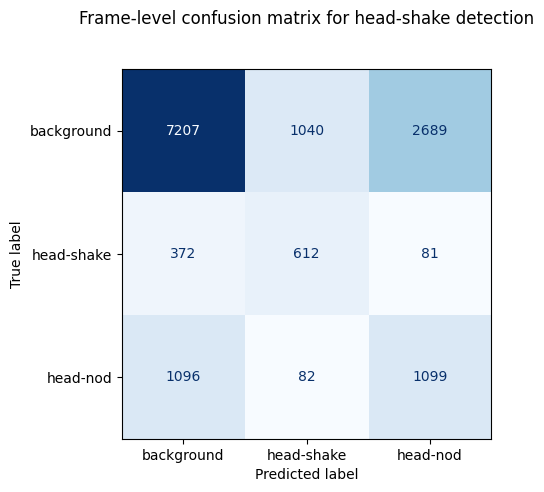

In [4]:
validate_folds('data/output/frames_v1.csv', 'data/folds', results_dir='data/results', window_size=36, filter_size=7, method='frame', model="hmm", test=False)

Loading samples from data/output/frames_v1.csv
Validating fold_5/1
Verified window size:  37


2024-10-01 16:21:53 py.warnings WARNING: /home/jetske22/sign_cas/Sign-Language-Thesis-main/models/processing/facial_movement.py:137: RuntimeWarning: invalid value encountered in scalar divide
  shoulder_angle = np.arctan((keypoints[5][1] - keypoints[6][1]) / abs(keypoints[5][0]-keypoints[6][0])) * (180 / math.pi)



Removing files that do not contain nods
Nr of files in validation/test data that contain nods:  3 / 32 , namely the indexes:  [0, 1, 4]
Label len, pred len:  8395 8395
Label len, pred len:  2495 2495
Label len, pred len:  3388 3388
Nr of validation samples:  3
TPS:  [117, 19, 16]
FPS:  [19, 47, 72]
FNS:  [39, 19, 33]
Precisions:  [0.8602941176470589, 0.2878787878787879, 0.18181818181818182]
Recalls:  [0.75, 0.5, 0.32653061224489793]


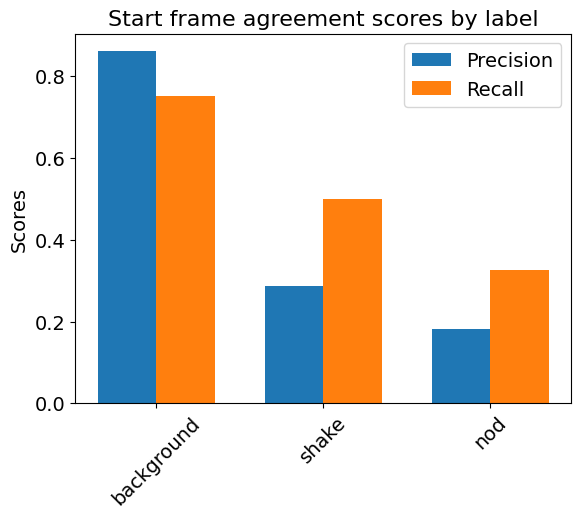

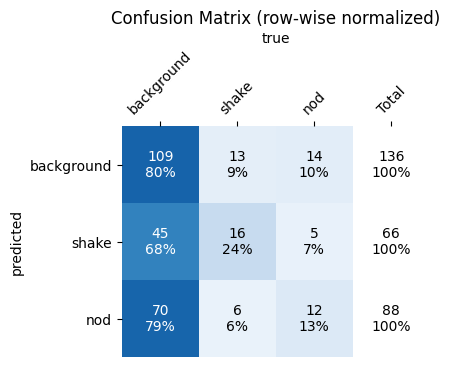

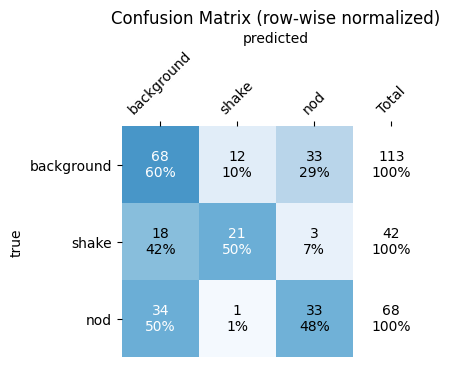

[0.17795677317209702, 0.37999959305998543, 0.19624978551516048]


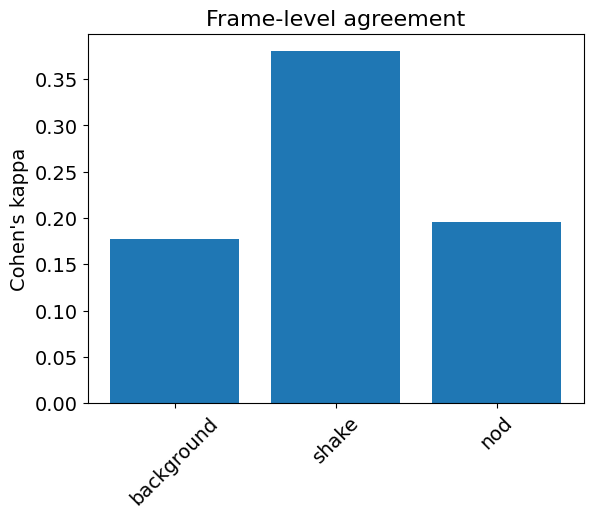

Cohens Kappa total:  0.22174167360307018


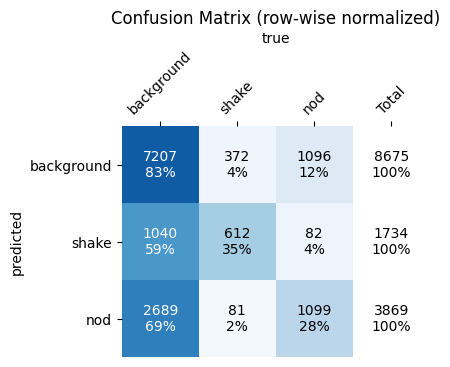

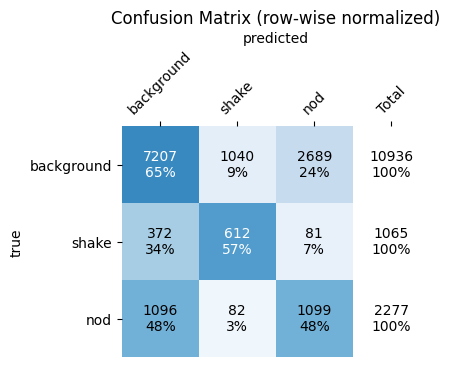

In [6]:
validate_folds('data/output/frames_v1.csv', 'data/folds', window_size=36, filter_size=7, method='event', model="hmm", test=False)

Loading samples from data/output/frames_v1.csv
Validating test
Verified window size:  37
Removing files that do not contain nods
Nr of files in validation/test data that contain nods:  5 / 39 , namely the indexes:  [0, 1, 7, 10, 13]
Label len, pred len:  7159 7159
Label len, pred len:  2495 2495
Label len, pred len:  1638 1638
Nr of test samples:  5
IoU:  {'background': 0.7114862242918122, 'shake': 0.15139626125086544, 'nod': 0.04183955739972337}
              precision    recall  f1-score   support

  background       0.83      0.83      0.83     17570
       shake       0.18      0.49      0.26      1341
         nod       0.43      0.04      0.08      2732

    accuracy                           0.71     21643
   macro avg       0.48      0.46      0.39     21643
weighted avg       0.74      0.71      0.70     21643



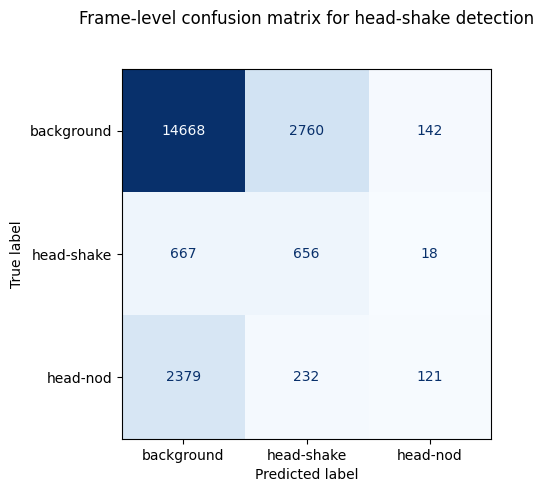

In [9]:
validate_folds('data/output/frames_v1.csv', 'data/folds', results_dir='data/results', window_size=36, filter_size=7, method='frame', model="hmm", test=True)

Loading samples from data/output/frames_v1.csv
Validating test
Verified window size:  37
Removing files that do not contain nods
Nr of files in validation/test data that contain nods:  5 / 39 , namely the indexes:  [0, 1, 7, 10, 13]
Label len, pred len:  7159 7159
Label len, pred len:  2495 2495
Label len, pred len:  1638 1638
Nr of test samples:  5
TPS:  [94, 17, 10]
FPS:  [16, 80, 11]
FNS:  [27, 22, 76]
Precisions:  [0.8545454545454545, 0.17525773195876287, 0.47619047619047616]
Recalls:  [0.7768595041322314, 0.4358974358974359, 0.11627906976744186]


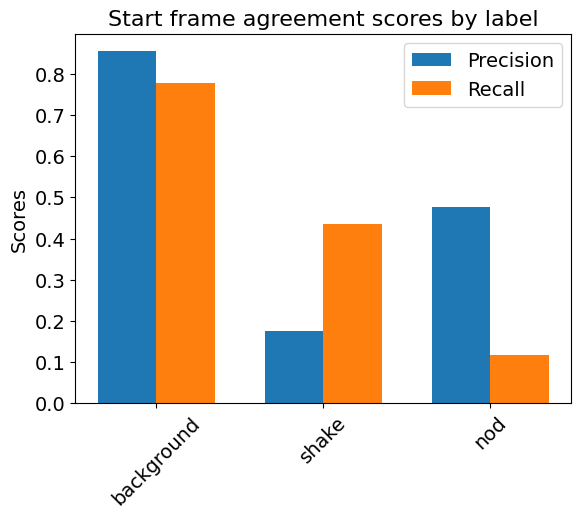

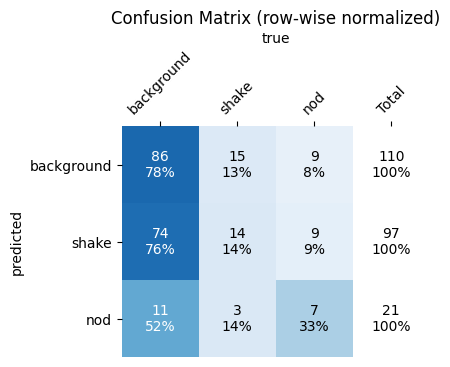

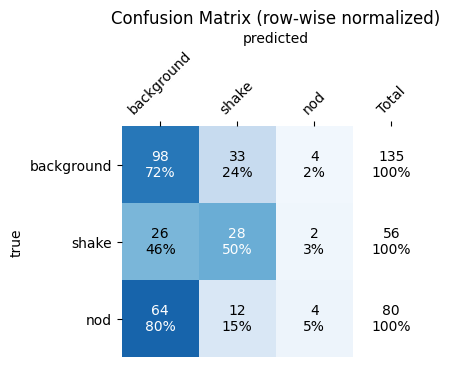

[0.08817780372764017, 0.18954183807273983, 0.05814249632606838]


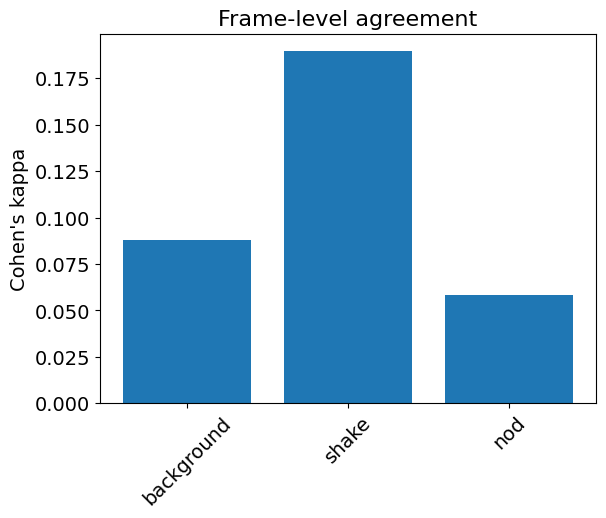

Cohens Kappa total:  0.11471055541802411


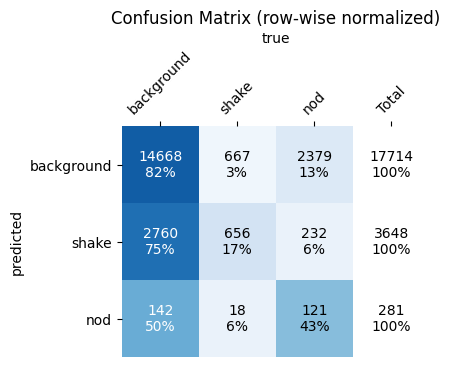

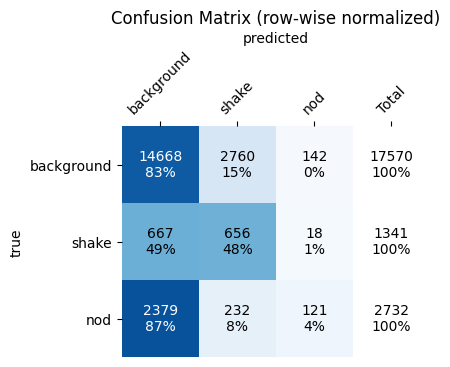

In [8]:
validate_folds('data/output/frames_v1.csv', 'data/folds', window_size=36, filter_size=7, method='event', model="hmm", test=True)

In [10]:
create_label_files('data/eaf_files/v1', 'data/output', 'data/output/frames_v1.csv', add_starts_ends=True)
fit_folds('data/output/frames_v1.csv', 'data/folds', 'hmm', window_size=36, load_values=True)

Labels saved!
Fitting for fold_5 as validation set
Loading train and val data from saved
Moving data to tensors
Initializing HMMs
Fitting Shake HMM
[1] Improvement: 15555.09375, Time: 4.167s
[2] Improvement: 5097.796875, Time: 4.516s
[3] Improvement: 1289.40625, Time: 4.817s
[4] Improvement: 436.875, Time: 4.855s
[5] Improvement: 211.21875, Time: 4.396s
[6] Improvement: 150.703125, Time: 4.509s
[7] Improvement: 138.21875, Time: 4.048s
[8] Improvement: 134.484375, Time: 4.019s
[9] Improvement: 160.0625, Time: 4.242s
[10] Improvement: 252.828125, Time: 4.267s
[11] Improvement: 458.46875, Time: 3.996s
[12] Improvement: 864.984375, Time: 4.156s
[13] Improvement: 1445.359375, Time: 4.02s
[14] Improvement: 1348.0625, Time: 3.938s
[15] Improvement: 678.125, Time: 3.971s
[16] Improvement: 329.359375, Time: 4.04s
[17] Improvement: 190.53125, Time: 3.937s
[18] Improvement: 123.796875, Time: 3.92s
[19] Improvement: 86.03125, Time: 3.91s
[20] Improvement: 61.71875, Time: 3.918s
[21] Improvement: 4

Loading samples from data/output/frames_v1.csv
Validating fold_5/1
Verified window size:  37


2024-10-01 16:35:10 py.warnings WARNING: /home/jetske22/sign_cas/Sign-Language-Thesis-main/models/processing/facial_movement.py:137: RuntimeWarning: invalid value encountered in scalar divide
  shoulder_angle = np.arctan((keypoints[5][1] - keypoints[6][1]) / abs(keypoints[5][0]-keypoints[6][0])) * (180 / math.pi)



Removing files that do not contain nods
Nr of files in validation/test data that contain nods:  3 / 32 , namely the indexes:  [0, 1, 4]
Label len, pred len:  8395 8395
Label len, pred len:  2495 2495
Label len, pred len:  3388 3388
Nr of validation samples:  3
IoU:  {'background': 0.579091274628066, 'shake': 0.27293064876957496, 'nod': 0.21427143713771737}
              precision    recall  f1-score   support

  background       0.83      0.66      0.73     10936
       shake       0.34      0.57      0.43      1065
         nod       0.28      0.47      0.35      2277

    accuracy                           0.62     14278
   macro avg       0.48      0.57      0.51     14278
weighted avg       0.70      0.62      0.65     14278



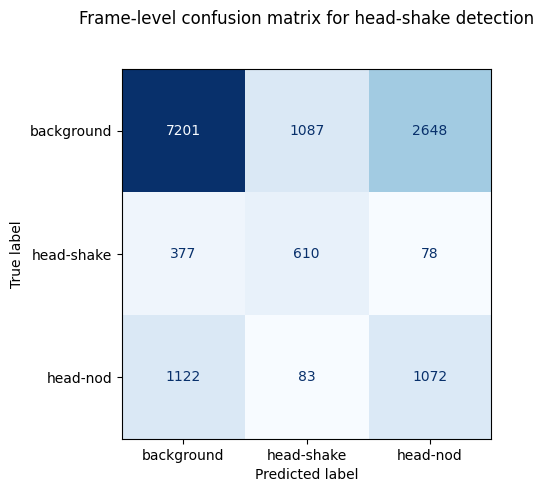

In [11]:
validate_folds('data/output/frames_v1.csv', 'data/folds', results_dir='data/results', window_size=36, filter_size=7, method='frame', model="hmm", test=False)

Loading samples from data/output/frames_v1.csv
Validating fold_5/1
Verified window size:  37


2024-10-01 16:44:11 py.warnings WARNING: /home/jetske22/sign_cas/Sign-Language-Thesis-main/models/processing/facial_movement.py:137: RuntimeWarning: invalid value encountered in scalar divide
  shoulder_angle = np.arctan((keypoints[5][1] - keypoints[6][1]) / abs(keypoints[5][0]-keypoints[6][0])) * (180 / math.pi)



Removing files that do not contain nods
Nr of files in validation/test data that contain nods:  3 / 32 , namely the indexes:  [0, 1, 4]
Label len, pred len:  8395 8395
Label len, pred len:  2495 2495
Label len, pred len:  3388 3388
Nr of validation samples:  3
TPS:  [124, 20, 17]
FPS:  [16, 46, 72]
FNS:  [37, 18, 34]
Precisions:  [0.8857142857142857, 0.30303030303030304, 0.19101123595505617]
Recalls:  [0.7701863354037267, 0.5263157894736842, 0.3333333333333333]


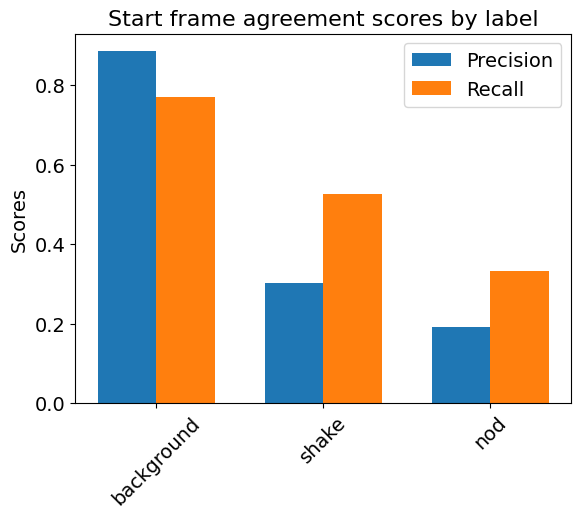

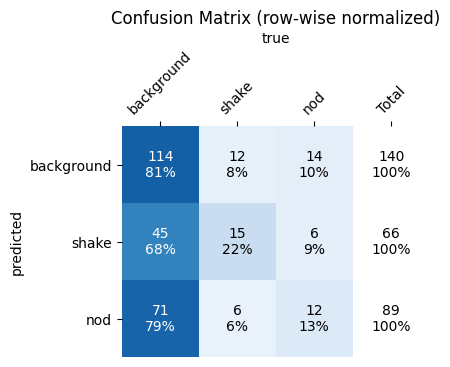

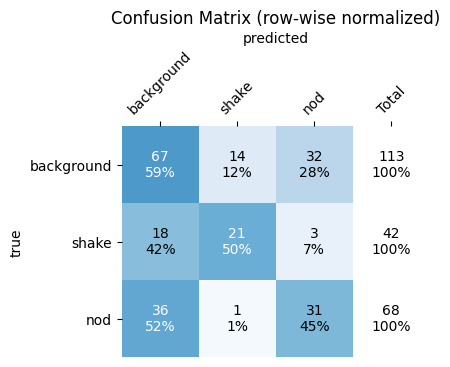

[0.17035932427500877, 0.3700228430951159, 0.19175419271221916]


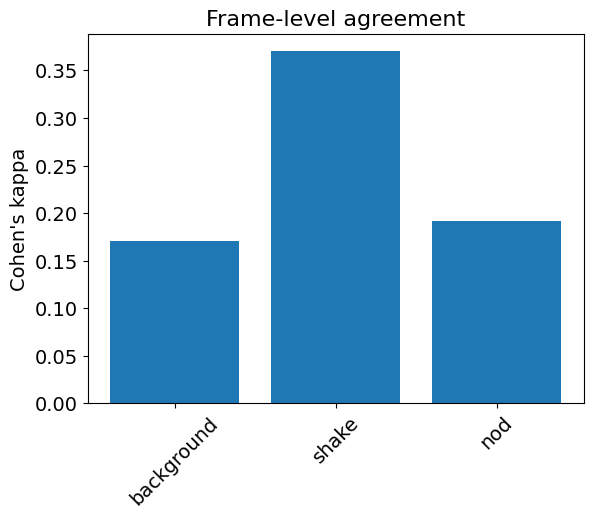

Cohens Kappa total:  0.2153773422948877


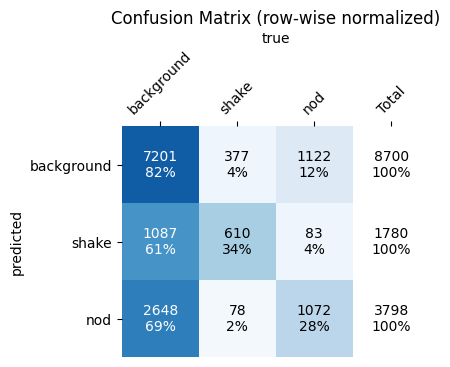

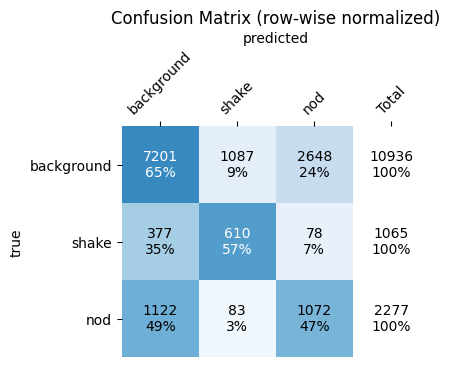

In [15]:
validate_folds('data/output/frames_v1.csv', 'data/folds', window_size=36, filter_size=7, method='event', model="hmm", test=False)

Loading samples from data/output/frames_v1.csv
Validating test
Verified window size:  37
Removing files that do not contain nods
Nr of files in validation/test data that contain nods:  5 / 39 , namely the indexes:  [0, 1, 7, 10, 13]
Label len, pred len:  7159 7159
Label len, pred len:  2495 2495
Label len, pred len:  1638 1638
Nr of test samples:  5
IoU:  {'background': 0.7090979706767647, 'shake': 0.15085714285714286, 'nod': 0.04313591235878124}
              precision    recall  f1-score   support

  background       0.83      0.83      0.83     17570
       shake       0.18      0.49      0.26      1341
         nod       0.40      0.05      0.08      2732

    accuracy                           0.71     21643
   macro avg       0.47      0.46      0.39     21643
weighted avg       0.73      0.71      0.70     21643



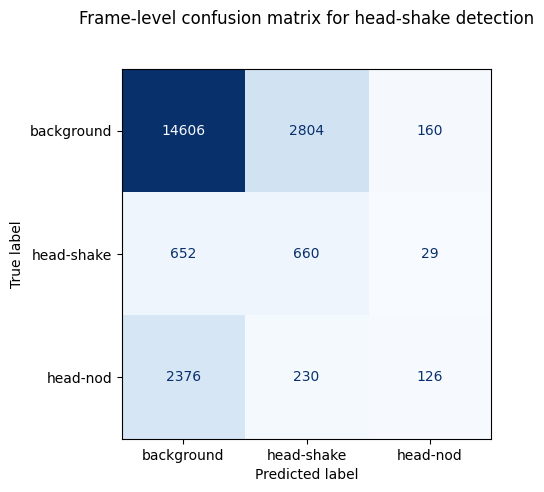

In [16]:
validate_folds('data/output/frames_v1.csv', 'data/folds', results_dir='data/results', window_size=36, filter_size=7, method='frame', model="hmm", test=True)

Loading samples from data/output/frames_v1.csv
Validating test
Verified window size:  37
Removing files that do not contain nods
Nr of files in validation/test data that contain nods:  5 / 39 , namely the indexes:  [0, 1, 7, 10, 13]
Label len, pred len:  7159 7159
Label len, pred len:  2495 2495
Label len, pred len:  1638 1638
Nr of test samples:  5
TPS:  [100, 17, 10]
FPS:  [17, 85, 14]
FNS:  [27, 24, 75]
Precisions:  [0.8547008547008547, 0.16666666666666666, 0.4166666666666667]
Recalls:  [0.7874015748031497, 0.4146341463414634, 0.11764705882352941]


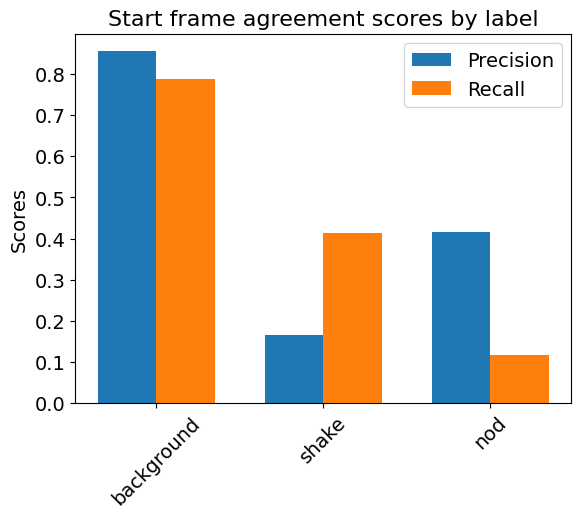

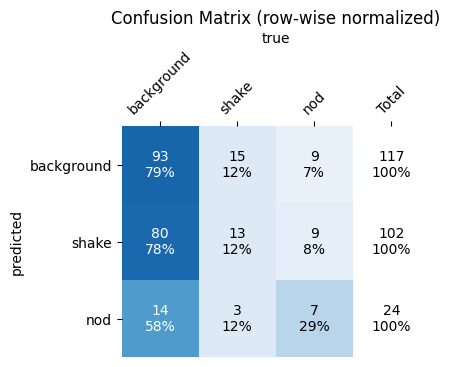

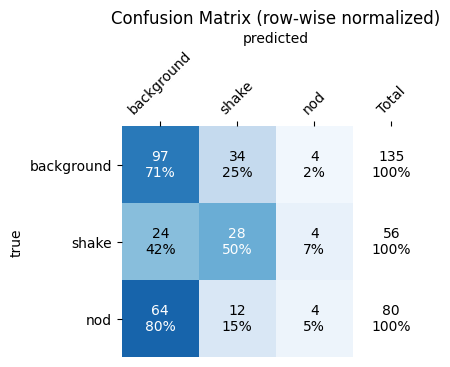

[0.0884045492251968, 0.18837545944616652, 0.058121797657770924]


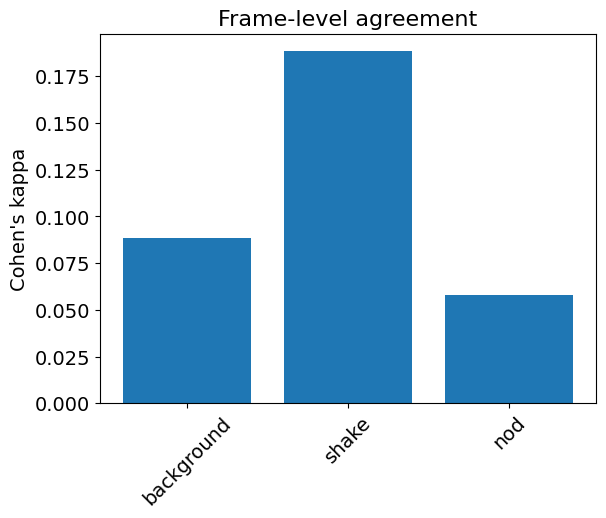

Cohens Kappa total:  0.11445162122661612


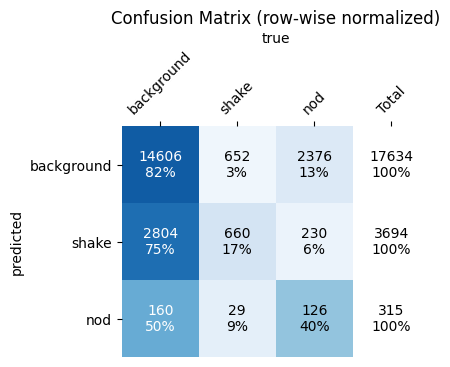

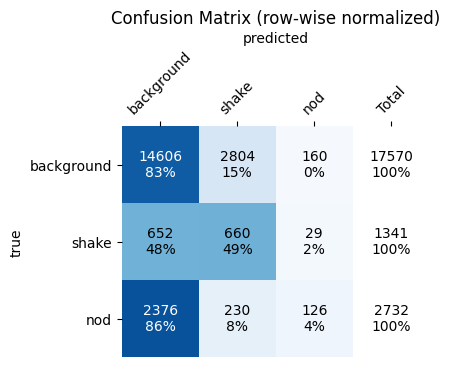

In [17]:
validate_folds('data/output/frames_v1.csv', 'data/folds', window_size=36, filter_size=7, method='event', model="hmm", test=True)

In [18]:
create_label_files('data/eaf_files/v2', 'data/output', 'data/output/frames_v2.csv', add_starts_ends=True)
fit_folds('data/output/frames_v2.csv', 'data/folds', 'hmm', window_size=36, load_values=True)

Labels saved!
Fitting for fold_5 as validation set
Loading train and val data from saved
Moving data to tensors
Initializing HMMs
Fitting Shake HMM
[1] Improvement: 18901.59375, Time: 4.189s
[2] Improvement: 8315.734375, Time: 5.036s
[3] Improvement: 2729.765625, Time: 6.055s
[4] Improvement: 1537.0, Time: 5.47s
[5] Improvement: 1623.5625, Time: 5.455s
[6] Improvement: 1315.265625, Time: 4.633s
[7] Improvement: 711.484375, Time: 4.59s
[8] Improvement: 359.359375, Time: 4.194s
[9] Improvement: 205.59375, Time: 4.029s
[10] Improvement: 133.53125, Time: 4.719s
[11] Improvement: 92.671875, Time: 4.219s
[12] Improvement: 66.609375, Time: 4.902s
[13] Improvement: 48.8125, Time: 4.475s
[14] Improvement: 36.328125, Time: 4.001s
[15] Improvement: 26.8125, Time: 4.125s
[16] Improvement: 19.90625, Time: 3.942s
[17] Improvement: 14.25, Time: 3.906s
[18] Improvement: 10.421875, Time: 3.876s
[19] Improvement: 7.203125, Time: 3.88s
[20] Improvement: 5.015625, Time: 3.93s
[21] Improvement: 3.6875, Tim

Loading samples from data/output/frames_v2.csv
Validating fold_5/1
Verified window size:  37


2024-10-01 16:55:39 py.warnings WARNING: /home/jetske22/sign_cas/Sign-Language-Thesis-main/models/processing/facial_movement.py:137: RuntimeWarning: invalid value encountered in scalar divide
  shoulder_angle = np.arctan((keypoints[5][1] - keypoints[6][1]) / abs(keypoints[5][0]-keypoints[6][0])) * (180 / math.pi)



Removing files that do not contain nods
Nr of files in validation/test data that contain nods:  3 / 32 , namely the indexes:  [0, 1, 4]
Label len, pred len:  8395 8395
Label len, pred len:  2495 2495
Label len, pred len:  3388 3388
Nr of validation samples:  3
IoU:  {'background': 0.6026442307692308, 'shake': 0.2581235697940503, 'nod': 0.23689816787388154}
              precision    recall  f1-score   support

  background       0.83      0.69      0.75     10936
       shake       0.33      0.53      0.41      1065
         nod       0.32      0.49      0.38      2277

    accuracy                           0.64     14278
   macro avg       0.49      0.57      0.52     14278
weighted avg       0.71      0.64      0.67     14278



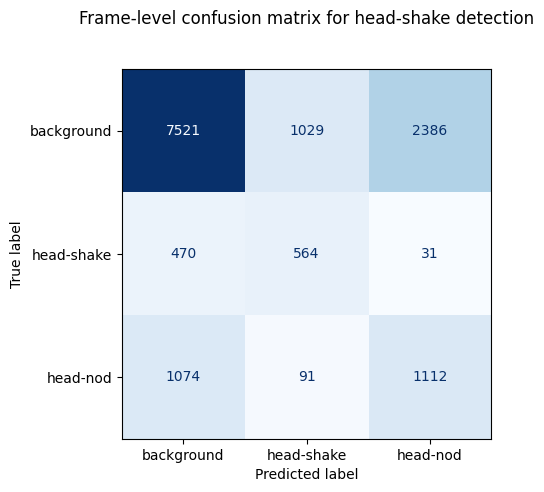

In [19]:
validate_folds('data/output/frames_v2.csv', 'data/folds', results_dir='data/results', window_size=36, filter_size=7, method='frame', model="hmm", test=False)

Loading samples from data/output/frames_v2.csv
Validating fold_5/1
Verified window size:  37


2024-10-01 16:55:48 py.warnings WARNING: /home/jetske22/sign_cas/Sign-Language-Thesis-main/models/processing/facial_movement.py:137: RuntimeWarning: invalid value encountered in scalar divide
  shoulder_angle = np.arctan((keypoints[5][1] - keypoints[6][1]) / abs(keypoints[5][0]-keypoints[6][0])) * (180 / math.pi)



Removing files that do not contain nods
Nr of files in validation/test data that contain nods:  3 / 32 , namely the indexes:  [0, 1, 4]
Label len, pred len:  8395 8395
Label len, pred len:  2495 2495
Label len, pred len:  3388 3388
Nr of validation samples:  3
TPS:  [118, 18, 19]
FPS:  [19, 40, 69]
FNS:  [38, 20, 33]
Precisions:  [0.8613138686131386, 0.3103448275862069, 0.2159090909090909]
Recalls:  [0.7564102564102564, 0.47368421052631576, 0.36538461538461536]


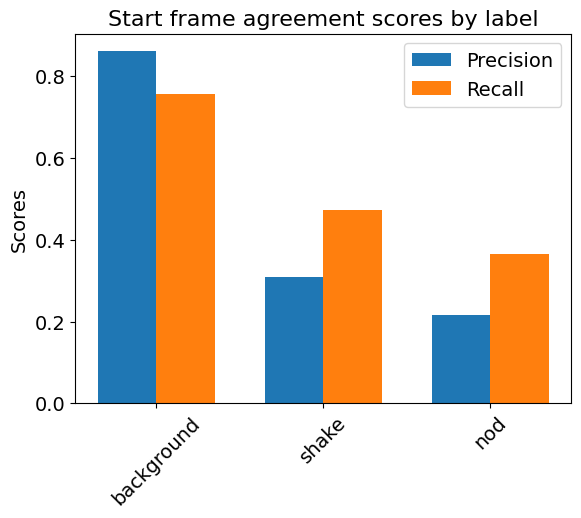

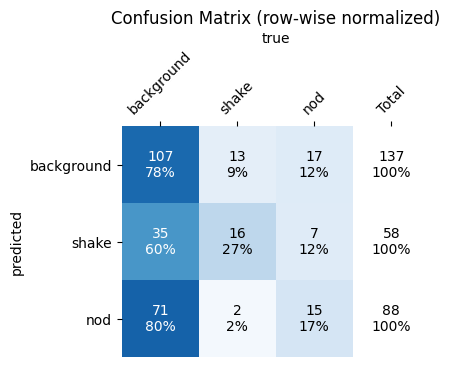

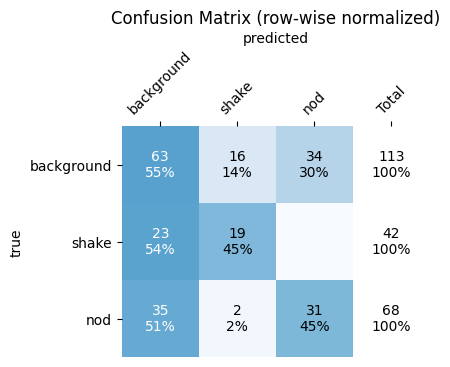

[0.18899343651980394, 0.3510236937678962, 0.23468366873617952]


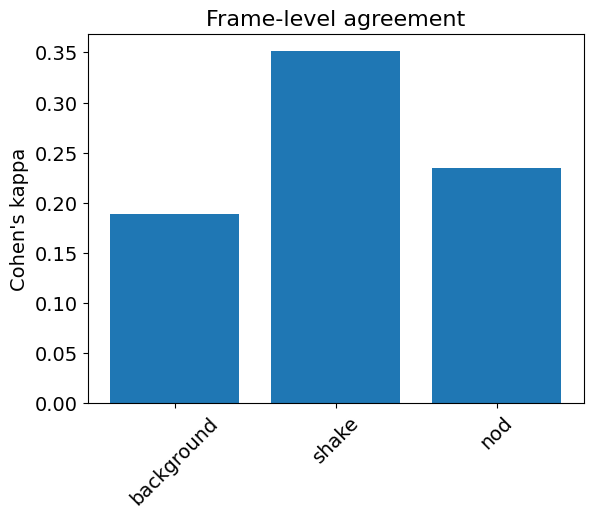

Cohens Kappa total:  0.23552722190609743


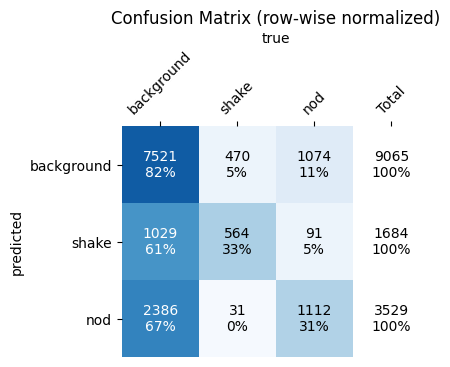

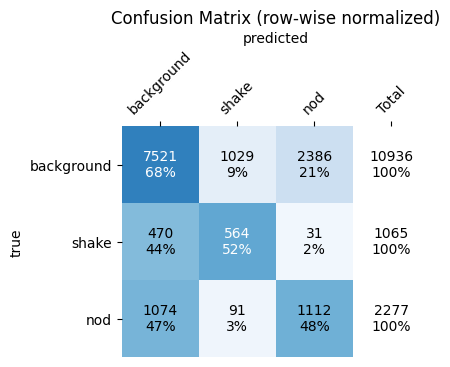

In [20]:
validate_folds('data/output/frames_v2.csv', 'data/folds', window_size=36, filter_size=7, method='event', model="hmm", test=False)

Loading samples from data/output/frames_v2.csv
Validating test
Verified window size:  37
Removing files that do not contain nods
Nr of files in validation/test data that contain nods:  5 / 39 , namely the indexes:  [0, 1, 7, 10, 13]
Label len, pred len:  7159 7159
Label len, pred len:  2495 2495
Label len, pred len:  1638 1638
Nr of test samples:  5
IoU:  {'background': 0.6928025539324756, 'shake': 0.13747276688453158, 'nod': 0.03334456045806669}
              precision    recall  f1-score   support

  background       0.82      0.82      0.82     17570
       shake       0.16      0.47      0.24      1341
         nod       0.29      0.04      0.06      2732

    accuracy                           0.70     21643
   macro avg       0.43      0.44      0.37     21643
weighted avg       0.71      0.70      0.69     21643



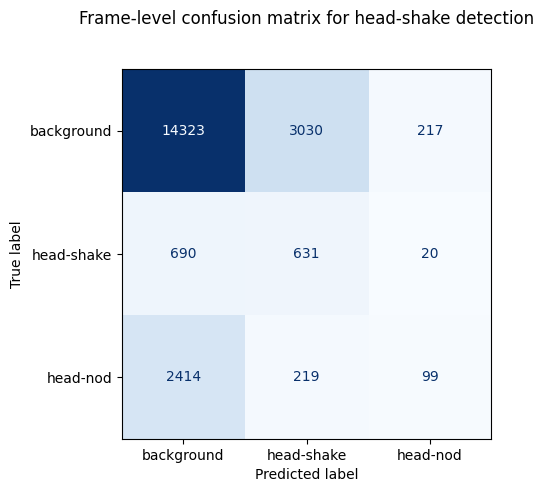

In [21]:
validate_folds('data/output/frames_v2.csv', 'data/folds', results_dir='data/results', window_size=36, filter_size=7, method='frame', model="hmm", test=True)

Loading samples from data/output/frames_v2.csv
Validating test
Verified window size:  37
Removing files that do not contain nods
Nr of files in validation/test data that contain nods:  5 / 39 , namely the indexes:  [0, 1, 7, 10, 13]
Label len, pred len:  7159 7159
Label len, pred len:  2495 2495
Label len, pred len:  1638 1638
Nr of test samples:  5
TPS:  [105, 16, 7]
FPS:  [15, 85, 17]
FNS:  [27, 28, 76]
Precisions:  [0.875, 0.15841584158415842, 0.2916666666666667]
Recalls:  [0.7954545454545454, 0.36363636363636365, 0.08433734939759036]


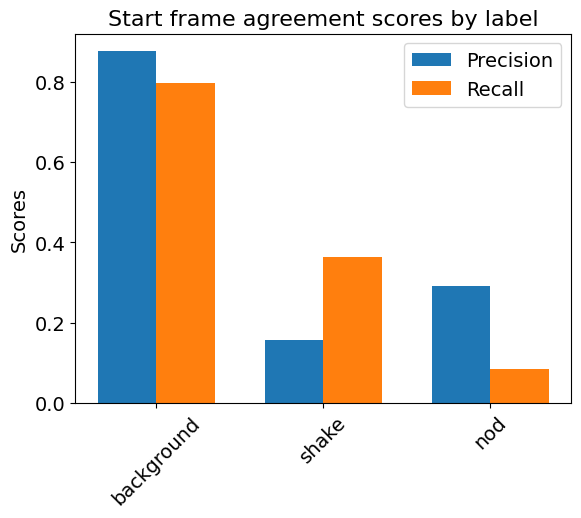

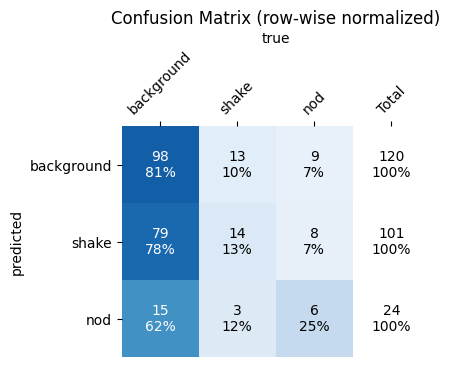

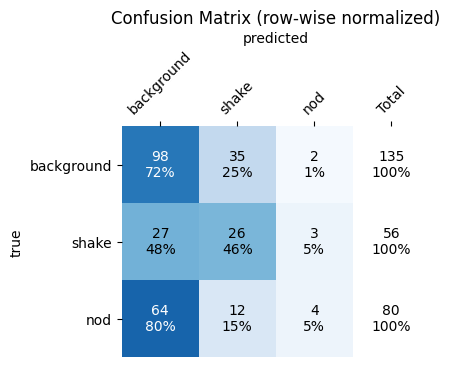

[0.052397937004586725, 0.1648014990806832, 0.03793722339812933]


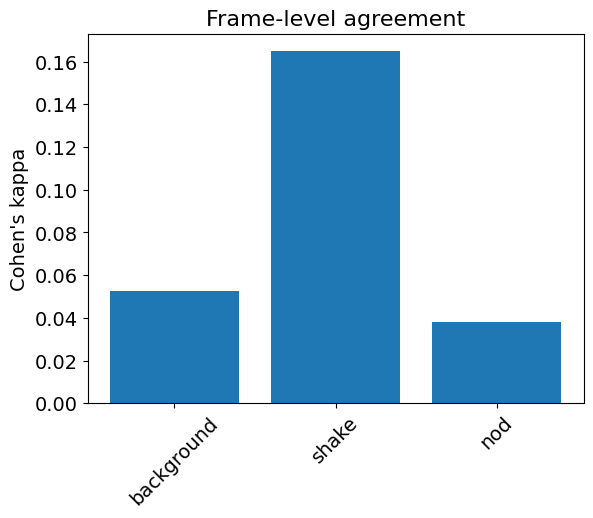

Cohens Kappa total:  0.08634296355514826


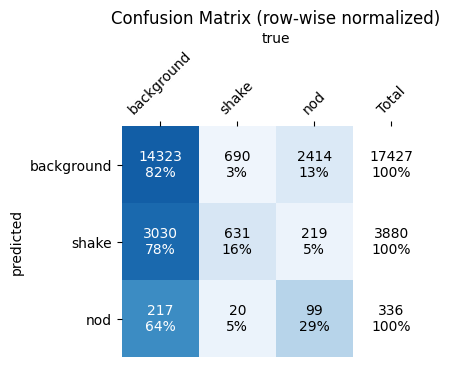

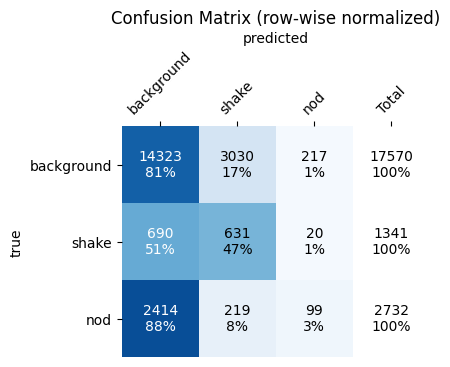

In [22]:
validate_folds('data/output/frames_v2.csv', 'data/folds', window_size=36, filter_size=7, method='event', model="hmm", test=True)

In [23]:
create_label_files('data/eaf_files/v3', 'data/output', 'data/output/frames_v2.csv', add_starts_ends=True)
# fit_folds('data/output/frames_v2.csv', 'data/folds', 'hmm', window_size=36, load_values=True)
# NO need to train again, as only the validation data has changed

Labels saved!


Loading samples from data/output/frames_v2.csv
Validating fold_5/1
Verified window size:  37


2024-10-01 16:56:30 py.warnings WARNING: /home/jetske22/sign_cas/Sign-Language-Thesis-main/models/processing/facial_movement.py:137: RuntimeWarning: invalid value encountered in scalar divide
  shoulder_angle = np.arctan((keypoints[5][1] - keypoints[6][1]) / abs(keypoints[5][0]-keypoints[6][0])) * (180 / math.pi)



Removing files that do not contain nods
Nr of files in validation/test data that contain nods:  32 / 32 , namely the indexes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
Label len, pred len:  8395 8395
Label len, pred len:  2495 2495
Label len, pred len:  5488 5488
Nr of validation samples:  32
IoU:  {'background': 0.6849425808401329, 'shake': 0.2092491253251996, 'nod': 0.2682579829276004}
              precision    recall  f1-score   support

  background       0.83      0.80      0.81    113194
       shake       0.26      0.50      0.35      9273
         nod       0.47      0.38      0.42     26591

    accuracy                           0.71    149058
   macro avg       0.52      0.56      0.53    149058
weighted avg       0.73      0.71      0.71    149058



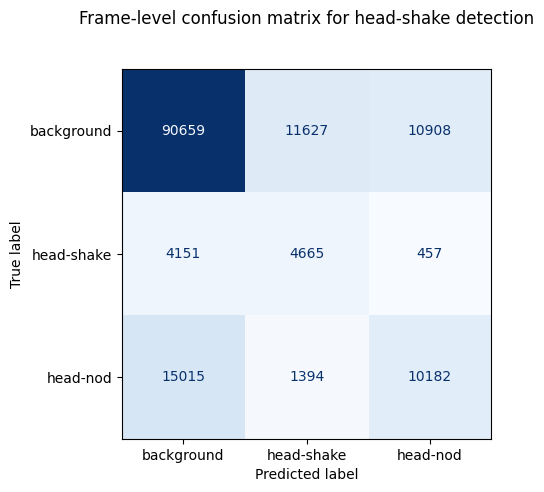

In [24]:
validate_folds('data/output/frames_v2.csv', 'data/folds', results_dir='data/results', window_size=36, filter_size=7, method='frame', model="hmm", test=False)

Loading samples from data/output/frames_v2.csv
Validating fold_5/1
Verified window size:  37


2024-10-01 16:56:46 py.warnings WARNING: /home/jetske22/sign_cas/Sign-Language-Thesis-main/models/processing/facial_movement.py:137: RuntimeWarning: invalid value encountered in scalar divide
  shoulder_angle = np.arctan((keypoints[5][1] - keypoints[6][1]) / abs(keypoints[5][0]-keypoints[6][0])) * (180 / math.pi)



Removing files that do not contain nods
Nr of files in validation/test data that contain nods:  32 / 32 , namely the indexes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
Label len, pred len:  8395 8395
Label len, pred len:  2495 2495
Label len, pred len:  5488 5488
Nr of validation samples:  32
TPS:  [1047, 125, 312]
FPS:  [274, 515, 473]
FNS:  [245, 205, 436]
Precisions:  [0.7925813777441333, 0.1953125, 0.3974522292993631]
Recalls:  [0.8103715170278638, 0.3787878787878788, 0.41711229946524064]


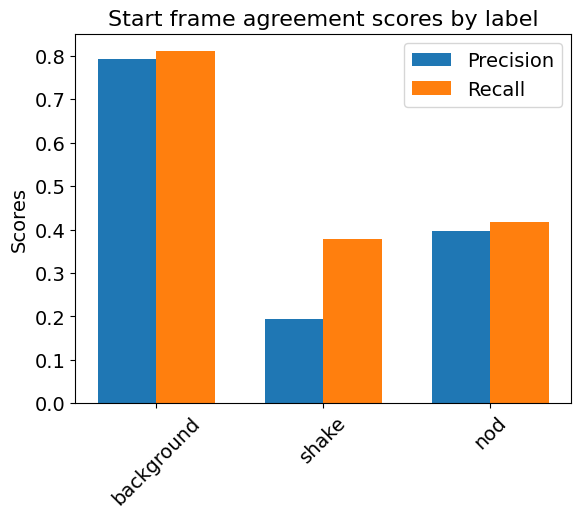

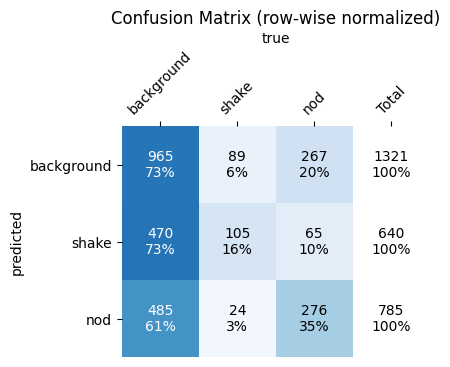

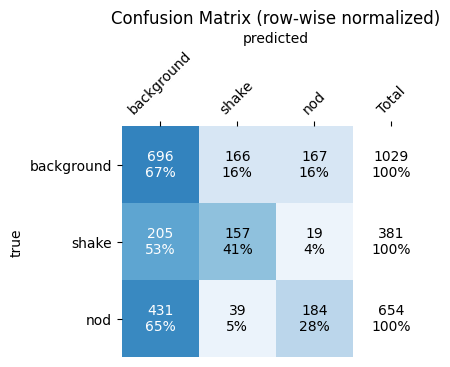

[0.2582234818179202, 0.2879612418524998, 0.3133797008676483]


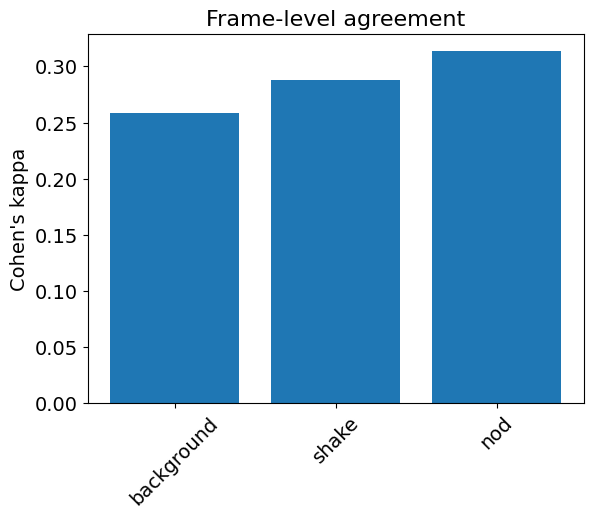

Cohens Kappa total:  0.28266087388041927


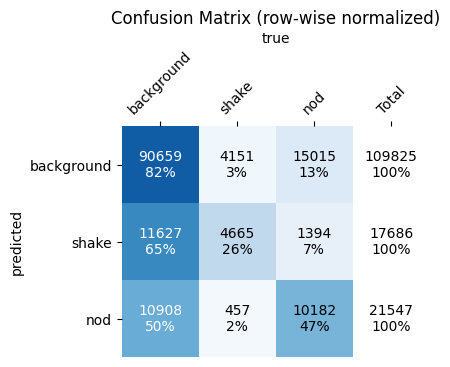

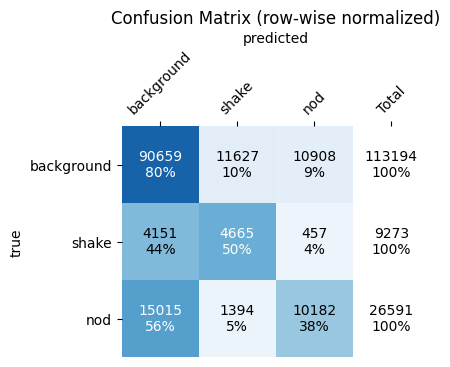

In [25]:
validate_folds('data/output/frames_v2.csv', 'data/folds', window_size=36, filter_size=7, method='event', model="hmm", test=False)

Range for flip ratio: 0.67-2.24
Mean for flip ratio: 1.37
Std for flip ratio: 0.4
########################################
Range for Levenshtein ratio: 0.54-0.94
Mean for Levenshtein ratio: 0.81
Std for Levenshtein ratio: 0.07
########################################
Range for Levenshtein distance: 143-3495
Mean for Levenshtein distance: 1239.41
Std for Levenshtein distance: 793.45
########################################
Range for accuracy: 0.42-0.89
Mean for accuracy: 0.71
Std for accuracy: 0.1
########################################
Range for precision: 0.47-0.93
Mean for precision: 0.74
Std for precision: 0.1
########################################
Range for recall: 0.42-0.89
Mean for recall: 0.71
Std for recall: 0.1
########################################
Range for f1 score: 0.43-0.91
Mean for f1: 0.71
Std for f1: 0.11
########################################


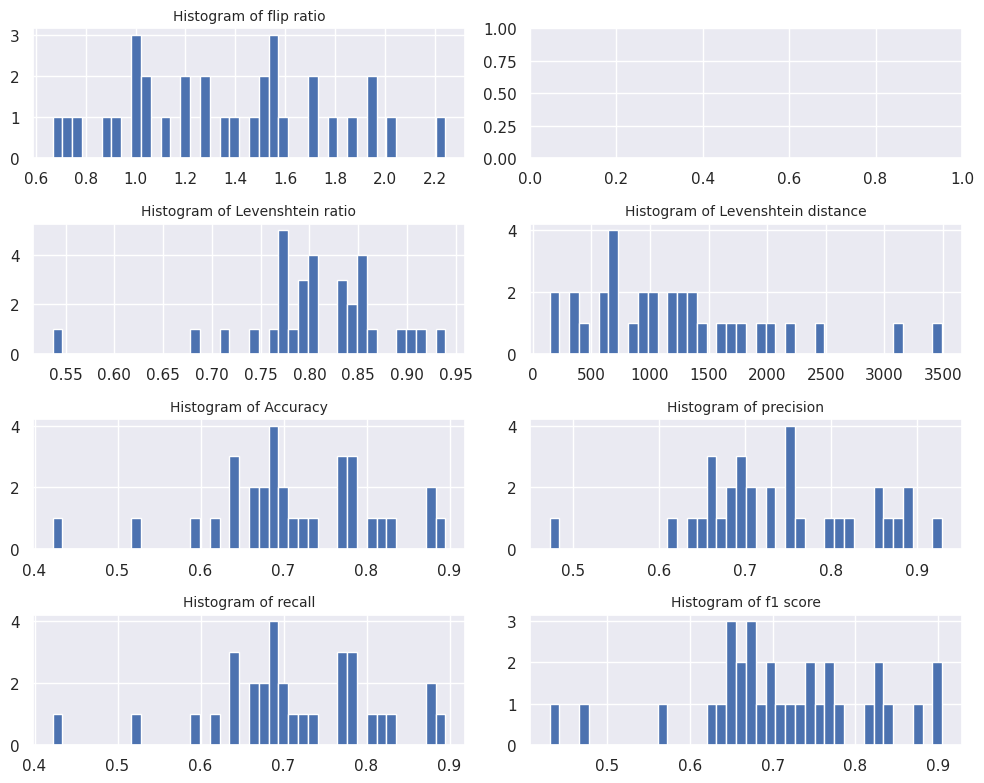

In [26]:
# this will only be useful for version 3 as the other datasets barely have any val and test data for nods
from models.hmm.prediction_visualisation import main as prediction_visualisation
prediction_visualisation('data/output/frames_v2.csv', 'data/results/predictions_hmm.npz', 'val')

Loading samples from data/output/frames_v2.csv
Validating test
Verified window size:  37
Removing files that do not contain nods
Nr of files in validation/test data that contain nods:  39 / 39 , namely the indexes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]
Label len, pred len:  7159 7159
Label len, pred len:  2495 2495
Label len, pred len:  2963 2963
Nr of test samples:  39
IoU:  {'background': 0.6809025928174126, 'shake': 0.20281509916826615, 'nod': 0.17237844576811193}
              precision    recall  f1-score   support

  background       0.85      0.78      0.81    141832
       shake       0.25      0.54      0.34     12420
         nod       0.31      0.28      0.29     22334

    accuracy                           0.70    176586
   macro avg       0.47      0.53      0.48    176586
weighted avg       0.74      0.70      0.71    176586



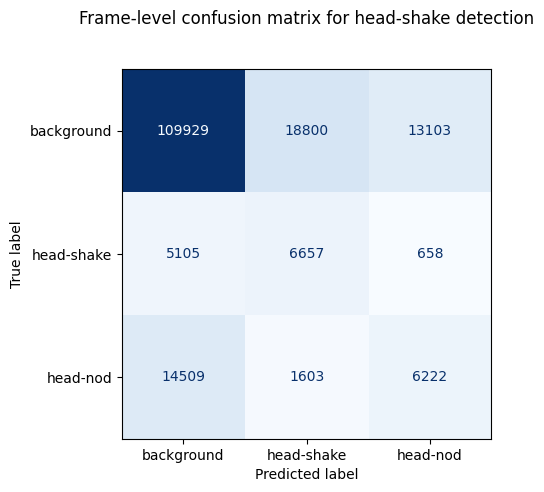

In [27]:
validate_folds('data/output/frames_v2.csv', 'data/folds', results_dir='data/results', window_size=36, filter_size=7, method='frame', model="hmm", test=True)

Loading samples from data/output/frames_v2.csv
Validating test
Verified window size:  37
Removing files that do not contain nods
Nr of files in validation/test data that contain nods:  39 / 39 , namely the indexes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]
Label len, pred len:  7159 7159
Label len, pred len:  2495 2495
Label len, pred len:  2963 2963
Nr of test samples:  39
TPS:  [1257, 138, 207]
FPS:  [238, 694, 551]
FNS:  [276, 232, 418]
Precisions:  [0.8408026755852843, 0.1658653846153846, 0.27308707124010556]
Recalls:  [0.8199608610567515, 0.372972972972973, 0.3312]


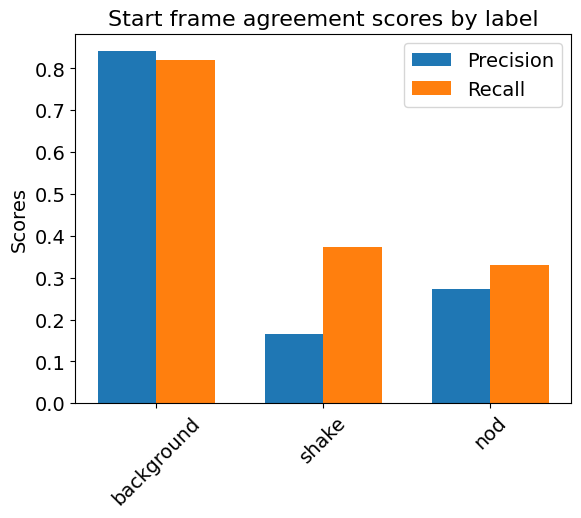

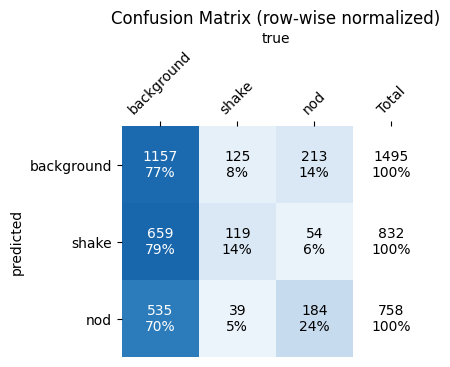

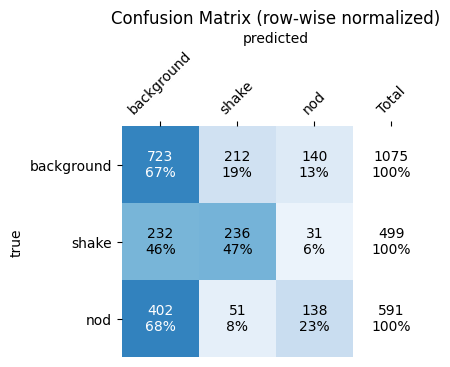

[0.18588652208492562, 0.2665148494798798, 0.19830360151060666]


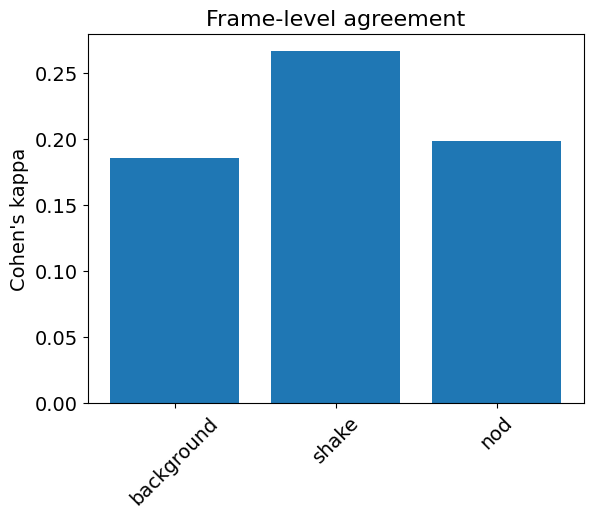

Cohens Kappa total:  0.21039901425704732


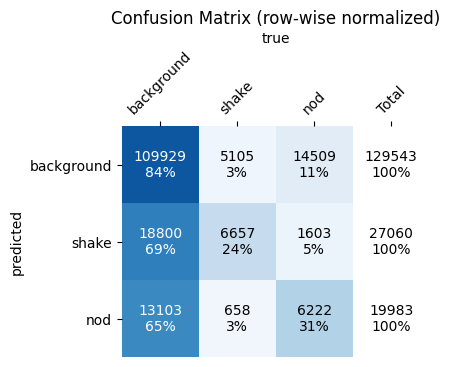

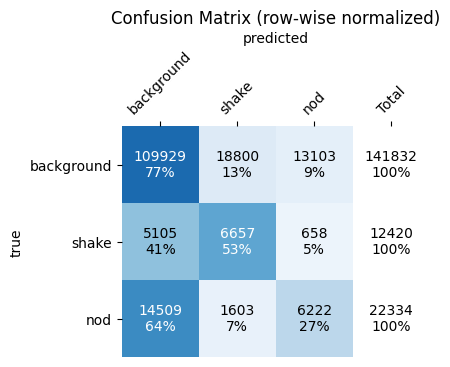

In [28]:
validate_folds('data/output/frames_v2.csv', 'data/folds', window_size=36, filter_size=7, method='event', model="hmm", test=True)

2024-10-01 16:57:54 py.warnings WARNING: /home/jetske22/sign_cas/signv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Range for flip ratio: 0.53-2.78
Mean for flip ratio: 1.49
Std for flip ratio: 0.54
########################################
Range for Levenshtein ratio: 0.55-0.89
Mean for Levenshtein ratio: 0.79
Std for Levenshtein ratio: 0.06
########################################
Range for Levenshtein distance: 186-3035
Mean for Levenshtein distance: 1256.59
Std for Levenshtein distance: 653.92
########################################
Range for accuracy: 0.41-0.8
Mean for accuracy: 0.68
Std for accuracy: 0.08
########################################
Range for precision: 0.53-0.82
Mean for precision: 0.71
Std for precision: 0.07
########################################
Range for recall: 0.41-0.8
Mean for recall: 0.68
Std for recall: 0.08
########################################
Range for f1 score: 0.46-0.8
Mean for f1: 0.67
Std for f1: 0.08
########################################


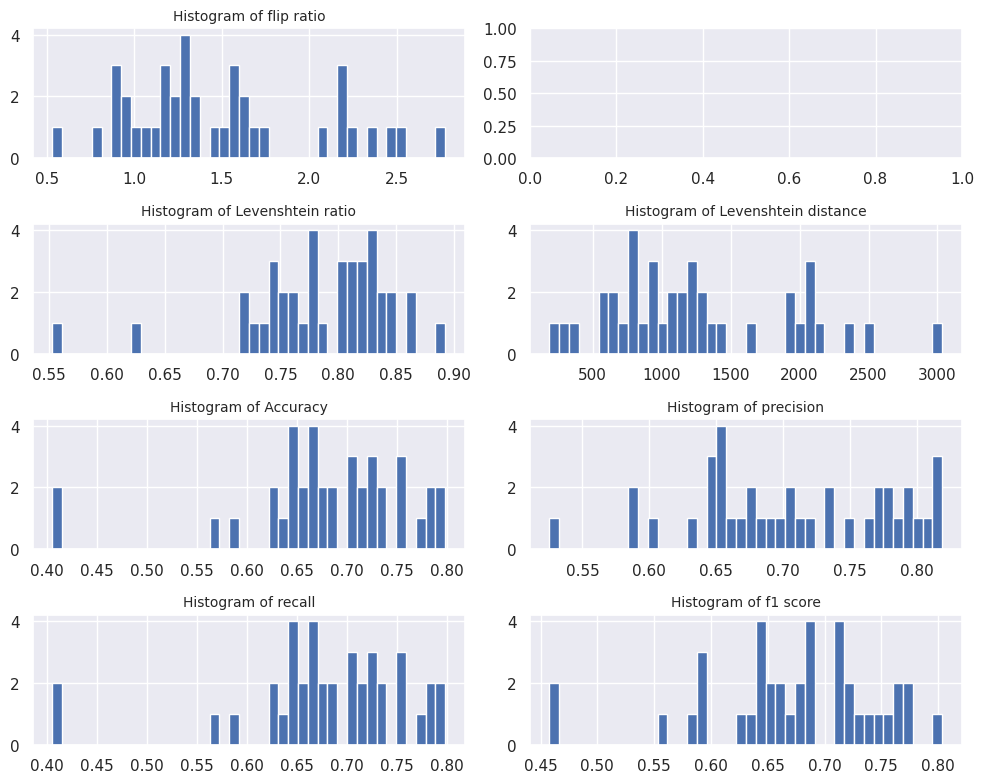

In [29]:
from models.hmm.prediction_visualisation import main as prediction_visualisation
prediction_visualisation('data/output/frames_v2.csv', 'data/results/predictions_test_hmm.npz', "test")